In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import  statsmodels.api as sm
from sklearn.metrics import roc_auc_score,roc_curve

In [15]:
bank = pd.read_csv("hmelq.csv")

In [16]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [3]:
bank.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


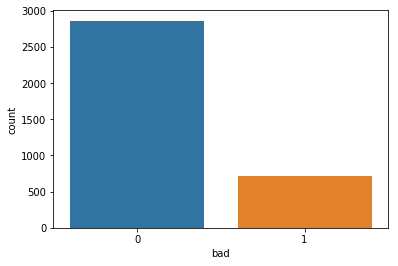

In [4]:
sns.countplot(bank.bad)

In [5]:
bank.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [6]:
bank.dropna(inplace = True)
y = bank['bad']
X = bank.drop(columns = ['bad'])

In [7]:
X = pd.get_dummies(X)

In [8]:
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
156,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
157,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [10]:
print('X_train shape : {} '.format(X_train.shape))
print('X_test shape : {} '.format(X_test.shape))
print('y_train shape : {} '.format(y_train.shape))
print('y_test shape : {} '.format(y_test.shape))


X_train shape : (1412, 18) 
X_test shape : (606, 18) 
y_train shape : (1412,) 
y_test shape : (606,) 


In [12]:
log = LogisticRegression( solver='lbfgs').fit(X_train,y_train)
model = log.fit(X_train,y_train)
model

C:\Users\numan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\numan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
pred = model.predict(X_test)

In [19]:
print('model intercept : {}'.format(model.intercept_));print('model coef : {} '.format(model.coef_))

model intercept : [-0.00661714]
model coef : [[-3.23684000e-05 -1.24268586e-06 -4.30915557e-07 -4.25218324e-02
   1.18077109e-02  2.82390729e-02 -6.13282622e-03  5.31551565e-03
  -3.75186959e-02  1.92167074e-02 -3.60116173e-03 -3.01569430e-03
   2.75701833e-04 -2.39027453e-03 -4.70732863e-03 -1.30581128e-03
   2.54665924e-04  1.25619067e-03]] 


In [20]:
con = confusion_matrix(y_test,pred)

In [21]:
pred = model.predict(X_test)
print('confusion matrix : \n',con);print('accuary score : {}'.format(accuracy_score(y_test,pred)))

confusion matrix : 
 [[553   1]
 [ 52   0]]
accuary score : 0.9125412541254125


In [22]:
print('Precision : {}'.format((con[0][0])/(con[0][0]+con[0][1])))
print('recal : {}'.format((con[0][0])/(con[0][0]+con[1][0])))

Precision : 0.9981949458483754
recal : 0.9140495867768595


In [23]:
print(classification_report(y_test,pred))#model 1 leri iyi ogrenirken 0 lari hic ogrenenenis model analiz edip p value degerleri 
# alpha dan kucuk olanlari atiyoruz.


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       554
           1       0.00      0.00      0.00        52

   micro avg       0.91      0.91      0.91       606
   macro avg       0.46      0.50      0.48       606
weighted avg       0.84      0.91      0.87       606



In [42]:
log = sm.Logit(y, X)
log_model = log.fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.228362
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2001
Method:                           MLE   Df Model:                           16
Date:                Mon, 23 Sep 2019   Pseudo R-squ.:                  0.2346
Time:                        13:04:12   Log-Likelihood:                -460.84
converged:                       True   LL-Null:                       -602.11
                                        LLR p-value:                 1.039e-50
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -1.73e-05   1.05e-05     -1.640      0.101    -3.8e-05    3.37e-06
mortdue        -4.777e-06   4.76e-06     -1.004      0.315   -1.41e-05    4.55e-06
value           4.089e-06   4.06e-06      1.006      0.314   -3.87e-06    1.21e-05
yoj               -0.0109      0.013     -0.854      0.393      -0.036       0.014
derog              0.5708      0.130      4.382      0.000       0.315       0.826
delinq             0.7985      0.095      8.448      0.000       0.613       0.984
clage             -0.0046      0.001     -3.354      0.001      -0.007      -0.002
ninq               0.1119      0.049      2.303      0.021       0.017       0.207
clno              -0.0286      0.011     -2.627      0.009      -0.050      -0.007
debtinc            0.1143      0.014      8.222      0.000       0.087       0.142
reason_DebtCon    -3.7938   1.26e+07  -3.02e-07      1.000   -2.46e+07    2.46e+07
reason_HomeImp    -3.8593   1.26e+07  -3.07e-07      1.000   -2.46e+07    2.46e+07
job_Mgr           -1.4722   1.26e+07  -1.17e-07      1.000   -2.46e+07    2.46e+07
job_Office        -2.0716   1.26e+07  -1.65e-07      1.000   -2.46e+07    2.46e+07
job_Other         -1.5260   1.26e+07  -1.22e-07      1.000   -2.46e+07    2.46e+07
job_ProfEx        -1.5377   1.26e+07  -1.22e-07      1.000   -2.46e+07    2.46e+07
job_Sales         -0.2487   1.26e+07  -1.98e-08      1.000   -2.46e+07    2.46e+07
job_Self          -0.7970   1.26e+07  -6.35e-08      1.000   -2.46e+07    2.46e+07
==================================================================================
"""

In [24]:
X_new = X.drop(['loan','mortdue','value','yoj','reason_DebtCon',
            'reason_HomeImp','job_Mgr','job_Office','job_Other','job_ProfEx','job_Sales','job_Self'],axis = 1)
        
    
        
       

In [25]:
X_new.head()
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size = 0.3,random_state = 42)


In [26]:
log_new = LogisticRegression(solver='lbfgs')
log_model = log_new.fit(X_train,y_train)
pred_new = log_new.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       554
           1       0.00      0.00      0.00        52

   micro avg       0.91      0.91      0.91       606
   macro avg       0.46      0.50      0.48       606
weighted avg       0.84      0.91      0.87       606



In [27]:
print('confusion matrix : \n',confusion_matrix(y_test,pred_new));print('accuary score : {}'.format(accuracy_score(y_test,pred_new)))

confusion matrix : 
 [[552   2]
 [ 44   8]]
accuary score : 0.9240924092409241


In [28]:
log_model.predict_proba(X_test)[0:10]

array([[0.93301483, 0.06698517],
       [0.8685956 , 0.1314044 ],
       [0.98196553, 0.01803447],
       [0.98698276, 0.01301724],
       [0.91818997, 0.08181003],
       [0.98242966, 0.01757034],
       [0.923354  , 0.076646  ],
       [0.89847302, 0.10152698],
       [0.97514527, 0.02485473],
       [0.95302307, 0.04697693]])

In [36]:
log_model_prob = log_model.predict_proba(X_test)[:,1]

In [41]:
log_pred = [1 if each > 0.3 else 0 for each in log_model_prob]

In [42]:
confusion_matrix(log_pred,y_test)

array([[546,  34],
       [  8,  18]], dtype=int64)

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
print("fpr: ",fpr[0:10])
print("tpr: ",tpr[0:10])
print("thresholds: ",thresholds[0:10])

fpr:  [0.         0.         0.         0.00180505 0.00180505 0.00361011
 0.00361011 0.00722022 0.00722022 0.00902527]
tpr:  [0.         0.01923077 0.11538462 0.11538462 0.15384615 0.15384615
 0.25       0.25       0.30769231 0.30769231]
thresholds:  [1.9902835  0.9902835  0.73763514 0.61600255 0.61208492 0.5737448
 0.3989672  0.38533803 0.34949087 0.34708244]


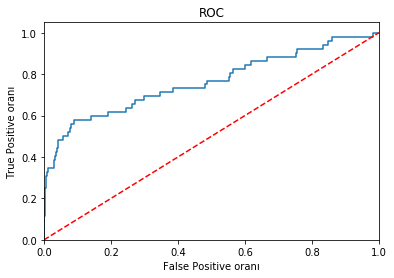

In [51]:

logit_roc_auc = roc_auc_score(y_test, log_model.predict(X_test))
logit_roc_auc 

plt.figure()
plt.plot(fpr, tpr, label ='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive oranı')
plt.ylabel('True Positive oranı')
plt.title('ROC')
plt.show() 